# Subject: Data Science Foundation

## Session 6 - Introduction to descriptive statistics

### Exercice 1 -  Descriptive Statistics For pandas Dataframe "Advertising Data"

Considering the Descriptive Statistics in Demo 2 develop the Descriptive Statistics for the variables “TV”, “radio” and “newspaper”. 

- Dataset: "Advertising" (available at http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv). 
- Interpret and discuss the Results. 
- Commit scripts in your GitHub account. You should export your solution code (.ipynb notebook) and push it to your repository “DataScienceFoundations”.


The following are the tasks that should complete and synchronize with your repository “DataScienceFoundations” until October 25. Please notice that none of these tasks is graded, however it’s important that you correctly understand and complete them in order to be sure that you won’t have problems with further assignments.

### Read data into a Dataframe:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Basic statistics 

Sum, Cumulative sum, Count the number of non-NA values, Count the number of NA values, Minimum value of TV, Minimum value of TV and Range of TV. Repeat for radio and newspaper.

In [9]:
print('TV sum: ', data.TV.sum())
print('TV count: ', data.TV.count())
print('TV NA values: ', data.TV.isnull().sum())
print('TV min: ', data.TV.min())
print('TV max: ', data.TV.max())
print('TV range: ', data.TV.max() - data.TV.min())

TV sum:  29408.499999999996
TV count:  200
TV NA values:  0
TV min:  0.7
TV max:  296.4
TV range:  295.7


In [10]:
print('Radio sum: ', data.radio.sum())
print('Radio count: ', data.radio.count())
print('Radio NA values: ', data.radio.isnull().sum())
print('Radio min: ', data.radio.min())
print('Radio max: ', data.radio.max())
print('Radio range: ', data.radio.max() - data.radio.min())

Radio sum:  4652.800000000005
Radio count:  200
Radio NA values:  0
Radio min:  0.0
Radio max:  49.6
Radio range:  49.6


In [11]:
print('Newspaper sum: ', data.newspaper.sum())
print('Newspaper count: ', data.newspaper.count())
print('Newspaper NA values: ', data.newspaper.isnull().sum())
print('Newspaper min: ', data.newspaper.min())
print('Newspaper max: ', data.newspaper.max())
print('Newspaper range: ', data.newspaper.max() - data.newspaper.min())

Newspaper sum:  6110.799999999999
Newspaper count:  200
Newspaper NA values:  0
Newspaper min:  0.3
Newspaper max:  114.0
Newspaper range:  113.7


## Central Tendency

Mean and Median.

In [12]:
data.mean()

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [14]:
data.median()

TV           149.75
radio         22.90
newspaper     25.75
sales         12.90
dtype: float64

## Measures of spread

Range, Variance, Standard deviation, Q1, Q2, Q3, Box-and-whisker plots and Histogram.

In [20]:
data.describe()[['TV', 'radio', 'newspaper']].T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0


In [21]:
data.var()

TV           7370.949893
radio         220.427743
newspaper     474.308326
sales          27.221853
dtype: float64

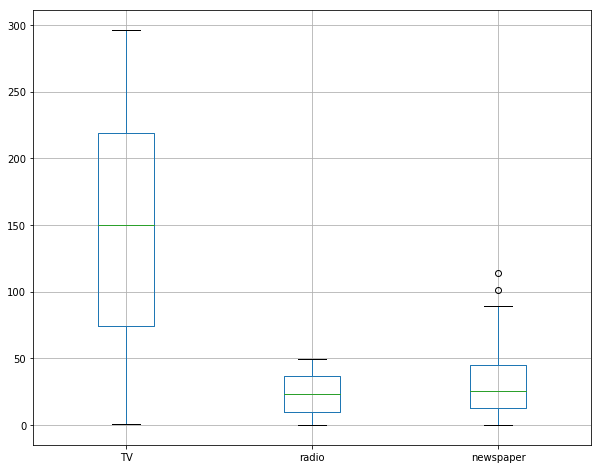

In [26]:
plt.figure(figsize=[10,8])
data.boxplot(['TV', 'radio', 'newspaper'])

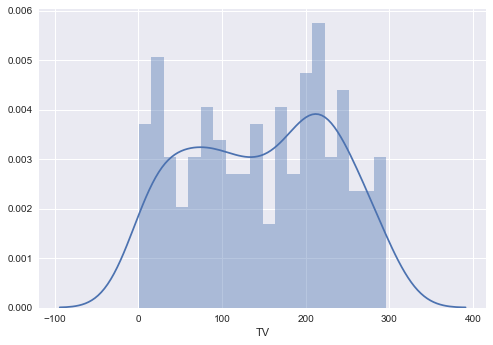

In [54]:
import seaborn as sns
sns.distplot(data.TV, bins=20)

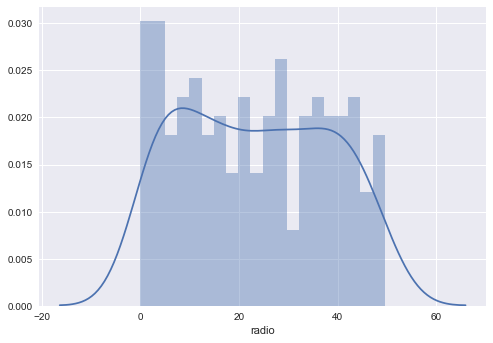

In [55]:
sns.distplot(data.radio, bins=20)

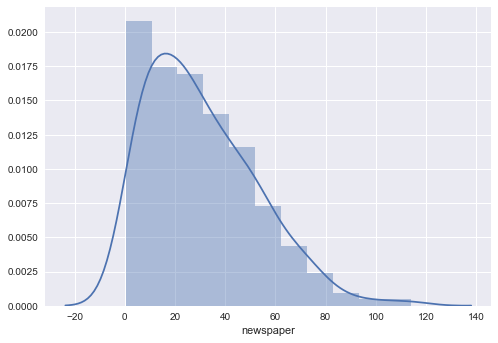

In [29]:
sns.distplot(data.newspaper)

## Finding outliers

In [32]:
data['radio_std'] = (abs(data['radio']-data['radio'].mean()) / data['radio'].std())

In [51]:
data.sort_values(by='radio_std', ascending=False).head(10)

,TV,radio,newspaper,sales,radio_std,TV_std,newspaper_std
59,210.8,49.6,37.7,23.8,1.773849,0.742625,0.328120
56,198.9,49.4,60.0,23.7,1.760378,0.604018,1.352060
38,74.7,49.4,45.7,14.7,1.760378,0.842620,0.695453
148,243.2,49.0,44.3,25.4,1.733436,1.120009,0.631169
129,220.3,49.0,3.2,24.7,1.733436,0.853278,1.256002
176,276.9,48.9,41.8,27.0,1.726701,1.512535,0.516378
6,8.7,48.9,75.0,7.2,1.726701,1.611365,2.040809
90,109.8,47.8,51.4,16.7,1.652611,0.433788,0.957177
16,195.4,47.7,52.9,22.4,1.645876,0.563251,1.026052
136,48.3,47.0,8.5,11.6,1.598727,1.150118,1.012644


In [34]:
data['TV_std'] = (abs(data['TV']-data['TV'].mean()) / data['TV'].std())

In [50]:
data.sort_values(by='TV_std', ascending=False).head(10)

,TV,radio,newspaper,sales,radio_std,TV_std,newspaper_std
102,296.4,36.3,100.9,23.8,0.878034,1.739664,3.230048
43,293.6,27.7,1.8,20.7,0.298785,1.707050,1.320286
131,0.7,39.6,8.7,1.6,1.100304,1.704546,1.003461
31,292.9,28.3,43.2,21.4,0.339197,1.698897,0.580661
36,290.7,4.1,8.5,12.8,1.290782,1.673272,1.012644
156,4.1,11.6,5.7,3.2,0.785623,1.664944,1.141211
99,289.7,42.3,51.2,25.4,1.282161,1.661624,0.947994
79,5.4,29.9,9.4,5.3,0.446965,1.649802,0.971320
184,287.6,43.0,71.8,26.2,1.329309,1.637164,1.893876
57,7.3,28.1,41.4,5.5,0.325727,1.627672,0.498011


In [35]:
data['newspaper_std'] = (abs(data['newspaper']-data['newspaper'].mean()) / data['newspaper'].std())

In [52]:
data.sort_values(by='newspaper_std', ascending=False).head(10)

,TV,radio,newspaper,sales,radio_std,TV_std,newspaper_std
17,67.8,36.6,114.0,12.5,0.898240,0.922989,3.831556
102,296.4,36.3,100.9,23.8,0.878034,1.739664,3.230048
76,16.9,43.7,89.4,8.7,1.376457,1.515854,2.702008
166,234.5,3.4,84.8,11.9,1.337931,1.018674,2.490791
119,125.7,36.9,79.2,15.9,0.918447,0.248590,2.233658
142,193.7,35.4,75.6,19.2,0.817415,0.543450,2.068359
6,8.7,48.9,75.0,7.2,1.726701,1.611365,2.040809
125,229.5,32.3,74.2,19.7,0.608616,0.960436,2.004075
89,88.3,25.5,73.4,12.9,0.150605,0.684212,1.967342
94,250.9,36.5,72.3,22.2,0.891505,1.209696,1.916834


#### Outliers:

In [45]:
data[data.newspaper_std > 2]

,TV,radio,newspaper,sales,radio_std,TV_std,newspaper_std
6,8.7,48.9,75.0,7.2,1.726701,1.611365,2.040809
17,67.8,36.6,114.0,12.5,0.898240,0.922989,3.831556
76,16.9,43.7,89.4,8.7,1.376457,1.515854,2.702008
102,296.4,36.3,100.9,23.8,0.878034,1.739664,3.230048
119,125.7,36.9,79.2,15.9,0.918447,0.248590,2.233658
125,229.5,32.3,74.2,19.7,0.608616,0.960436,2.004075
142,193.7,35.4,75.6,19.2,0.817415,0.543450,2.068359
166,234.5,3.4,84.8,11.9,1.337931,1.018674,2.490791


## Skewness and Kurtosis

In [47]:
print('TV Skewness: ', data.TV.skew())
print('TV Kurtosis: ', data.TV.kurt())

TV Skewness:  -0.0698533621327
TV Kurtosis:  -1.22649482423


In [48]:
print('Radio Skewness: ', data.radio.skew())
print('Radio Kurtosis: ', data.radio.kurt())

Radio Skewness:  0.0941746314966
Radio Kurtosis:  -1.26040140331


In [49]:
print('Newspaper Skewness: ', data.newspaper.skew())
print('Newspaper Kurtosis: ', data.newspaper.kurt())

Newspaper Skewness:  0.894720407499
Newspaper Kurtosis:  0.649501909138


## Question: Which variable set has the larger standard deviation? What is its impact?

The largest standard deviation comes from the variable TV. That means that the values are spread out over a wide range of values and not concentrated around the mean